the mimimal ASE is 1442.6982227952915 with lambd =22.3


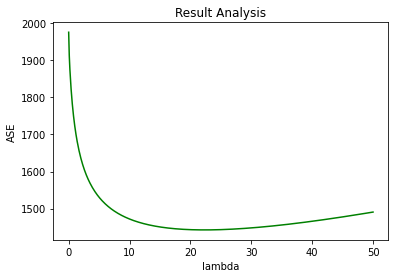

the OLS is 1975.4147393421724


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import math

# load the diabetes dataset
df=pd.read_csv('data.csv')
target_name="Y"
target=df[target_name]



stand = np.std(df)
newdf = (df - df.mean())/np.std(df)

bx = plt.gca()
plt.title('Result Analysis')
plt.xlabel('lambda')
plt.ylabel('ASE')

X=newdf[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
X=np.array(X)
Y=df['Y']
Y=np.array(Y)
ASEs = []
lmd=np.arange(0,50.1, 0.1)

for lams in lmd:
    sum = 0
    Y_pre = []
    for i in range(38):
        X_test = X[i].reshape(1,-1)
        X1 = np.delete(X, i,axis=0)
        Y1 = np.delete(Y, i,axis=0)

        ridge2 = linear_model.Ridge(alpha=lams)
        ridge2.fit(X1, Y1)
        y_pre = ridge2.predict(X_test)
        Y_pre.append(y_pre[0])
        sum += math.pow(y_pre[0] - Y[i], 2)
    ASE = sum / 38
    ASEs.append(ASE)
print(f"the mimimal ASE is {min(ASEs)} with lambd ={ASEs.index(min(ASEs)) * 0.1 }")
bx.plot(lmd, ASEs, color='green')
plt.show()


sum = 0
for i in range(38):
    X_test = X[i].reshape(1,-1)
    X1 = np.delete(X, i,axis=0)
    Y1 = np.delete(Y, i,axis=0)

    ridge2 = linear_model.LinearRegression()
    ridge2.fit(X1, Y1)
    y_pre = ridge2.predict(X_test)
    sum += math.pow(y_pre[0] - Y[i], 2)
OLS = sum / 38

print(f"the OLS is {OLS}")